In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble

In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

# dates = [2018, 2019]

# dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
dates = [2019, 2020]
# dates = [2018, 2019]

dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
 	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		# exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		# exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140
trainer = TrainerEnsemble(config, dataset, patchesHandler)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy'}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123]

In [7]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [8]:
# ic(type(dataset), exp, dataset.dates)


In [9]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]


In [10]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3359 2084
Mask size:  (16795, 10420)


In [11]:

trainer.label_mask.dtype

dtype('uint8')

In [12]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [109996296   2271496  62736108]
[62.9, 1.3, 35.8]


In [13]:
# pdb.set_trace()

In [14]:

trainer.getLabelCurrentDeforestation()

In [15]:

trainer.loadInputImage()

ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)


In [16]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.07692308, 0.15384616, 0.23076925, 0.30769232,
        0.3846154 , 0.4615385 , 0.53846157, 0.61538464, 0.6923077 ,
        0.7692308 , 0.84615386, 0.923077  , 1.        ], dtype=float32),
 array([112618766,   2096062,   1054083,   1098901,   1007787,    876898,
           648966,    708581,    287191,    313901,    338545,    240796,
          1332783,  52380640], dtype=int64))

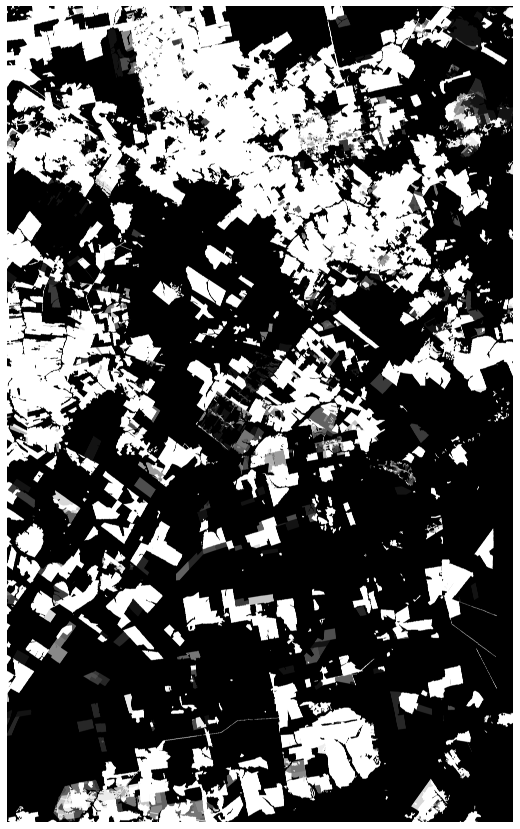

In [17]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [18]:

trainer.getImageChannels()

ic| self.image_stack.shape: (16795, 10420, 21)
ic| self.channels: 21


In [19]:

trainer.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


In [20]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [21]:
if config["training"] == True:
    trainer.extractCoords()

In [22]:
if config["training"] == True:
    trainer.trainTestSplit()

In [23]:
if config["training"] == True:
    trainer.label_mask.shape

In [24]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [25]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [26]:
if config["training"] == True:
    print(trainer.coords_train)

In [27]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [28]:
if config["training"] == True:
    inputSnipShow = True

In [29]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [30]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [31]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [36]:
if config["training"] == True:
    trainer.getGenerators()


In [37]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [38]:
if config["training"] == True:
    print(trainer.path_exp)

In [39]:
if config["training"] == True:
    print(trainer.channels)

In [40]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [41]:
if config["training"] == True:
    trainer.train()

In [42]:
if config["training"] == True:
    trainer.plotHistory()


In [43]:
trainer.image_stack.shape

(16795, 10420, 21)

In [44]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [45]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [46]:
trainer.image_stack.shape

(16795, 10420, 21)

In [47]:
trainer.setPadding()

-5.0 -12.0


In [48]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [49]:
trainer.loadPredictedProbabilities()

In [50]:
trainer.prob_rec.shape

(16800, 10432, 10)

In [51]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [52]:
trainer.prob_rec.shape

(16800, 10432, 10)

In [53]:
trainer.getMeanProb()

In [54]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 3.8692526e-14
    np.mean(value): 0.015202623
    np.max(value): 0.99998885


In [55]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (16800, 10432)


(16800, 10432)

In [56]:
trainer.unpadMeanProb()

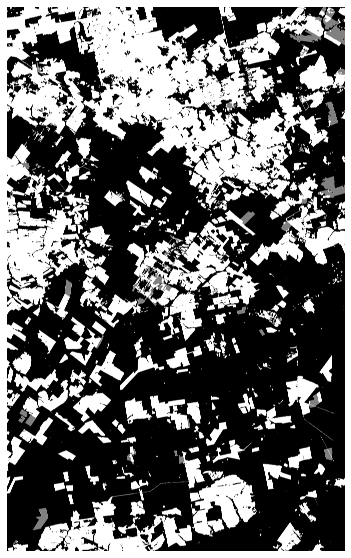

In [57]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [58]:
trainer.squeezeLabel()

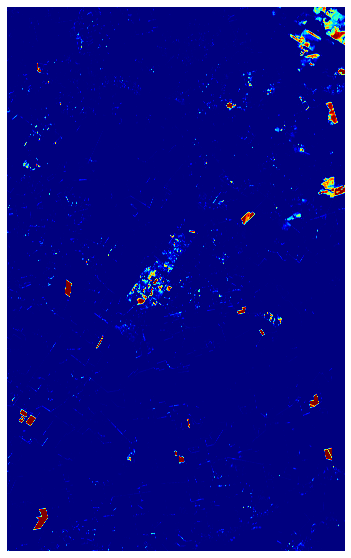

In [59]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [60]:
print(trainer.label_mask.shape)

(16795, 10420)


In [61]:
trainer.getLabelTest()

(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))


In [62]:
# trainer.getMAP()

In [63]:
trainer.prob_rec.shape

(16800, 10432, 10)

In [64]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 16800, 10432, 1)


In [65]:
trainer.prob_rec.shape

(10, 16800, 10432, 1)

In [66]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 2.2469558e-30
    np.mean(value): 0.015203303
    np.max(value): 1.0


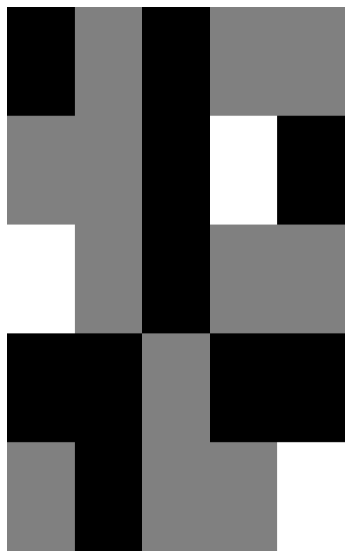

In [67]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [68]:
trainer.getLabelCurrentDeforestation()

In [69]:
trainer.applyProbabilityThreshold()

(16795, 10420)
(array([0., 1.], dtype=float32), array([173025168,   1978732], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)


In [70]:
trainer.getTestValues()

ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)


In [71]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([173025168,   1978732], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([173203831,   1800069], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174825237,    178663], dtype=int64))


In [72]:
trainer.calculateMetrics()

ic| self.f1: 80.97, self.precision: 91.6, self.recall: 72.55


In [73]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11787481,)
ic| f1_val: 96.99
    precision_val: 98.25
    recall_val: 95.75
    mAP_val: 99.28


In [74]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [75]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([174165439,    838461], dtype=int64))


In [76]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


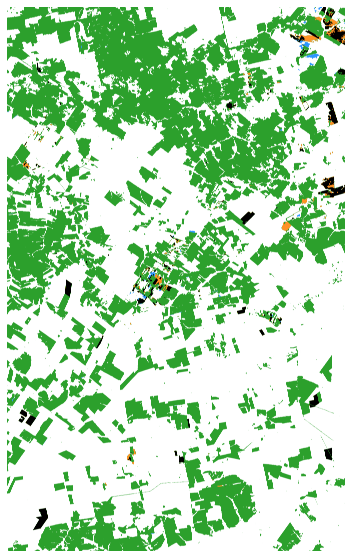

In [77]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [78]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [79]:
print(trainer.prob_rec.shape)
print(np.mean(trainer.prob_rec, axis=0).shape)

(10, 16800, 10432, 1)
(16800, 10432, 1)


In [80]:
'''
plt.figure(figsize=(15,15))
plt.imshow(trainer.prob_tmp)
prob_tmp_unpad = trainer.prob_tmp.copy()
prob_tmp_unpad = prob_tmp_unpad[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]  

prob_tmp_unpad[trainer.label_mask == 2] = 0
'''

'\nplt.figure(figsize=(15,15))\nplt.imshow(trainer.prob_tmp)\nprob_tmp_unpad = trainer.prob_tmp.copy()\nprob_tmp_unpad = prob_tmp_unpad[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]  \n\nprob_tmp_unpad[trainer.label_mask == 2] = 0\n'

In [81]:
'''
plt.figure(figsize=(5,5))
lims = dataset.previewLims1
plt.imshow(prob_tmp_unpad[lims[0]:lims[1], lims[2]:lims[3]])

crop = (800,580)
print(prob_tmp_unpad[lims[0]:lims[1], lims[2]:lims[3]][crop[0],crop[1]])
print(trainer.prob_tmp[lims[0]:lims[1], lims[2]:lims[3]][crop[0],crop[1]])
plt.plot(crop[1], crop[0], marker='v', color="white")
'''

'\nplt.figure(figsize=(5,5))\nlims = dataset.previewLims1\nplt.imshow(prob_tmp_unpad[lims[0]:lims[1], lims[2]:lims[3]])\n\ncrop = (800,580)\nprint(prob_tmp_unpad[lims[0]:lims[1], lims[2]:lims[3]][crop[0],crop[1]])\nprint(trainer.prob_tmp[lims[0]:lims[1], lims[2]:lims[3]][crop[0],crop[1]])\nplt.plot(crop[1], crop[0], marker=\'v\', color="white")\n'

In [82]:
# trainer.prob_rec[0,6500,6300]

In [83]:
epsilon = 1e-15
def get_mean(pred_probs):
    return np.mean(pred_probs, axis=0)
    
def predictive_entropy(pred_probs):
    pred_mean = get_mean(pred_probs) # shape (patch_len, patch_len, class_n)
    pred_entropy = np.zeros((pred_mean.shape[0:2]))
    K = pred_mean.shape[-1]
    for k in range(K):
        pred_entropy = pred_entropy + pred_mean[..., k] * np.log(pred_mean[..., k] + epsilon) 
    pred_entropy = - pred_entropy / np.log(K)
    return pred_entropy

In [84]:
# trainer.prob_rec_classes.shape

AttributeError: 'TrainerEnsemble' object has no attribute 'prob_rec_classes'

In [ ]:
# pred_entropy = predictive_entropy(trainer.prob_rec_classes)
# print(pred_entropy.shape)

(16800, 10432)


In [ ]:
# print(np.min(pred_entropy), np.max(pred_entropy))

4.3130938565408615e-05 0.9999993941271782


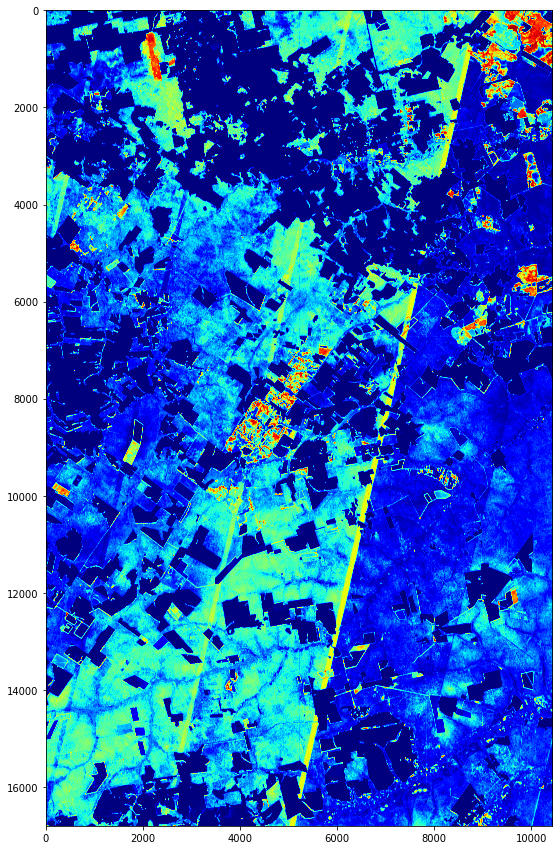

In [ ]:
# plt.figure(figsize=(15,15))
# plt.imshow(pred_entropy, cmap='jet')

'\nprob_tmp_unpad = trainer.prob_tmp.copy()\nprob_tmp_unpad = prob_tmp_unpad[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]  \n\nprob_tmp_unpad[trainer.label_mask == 2] = 0\n'

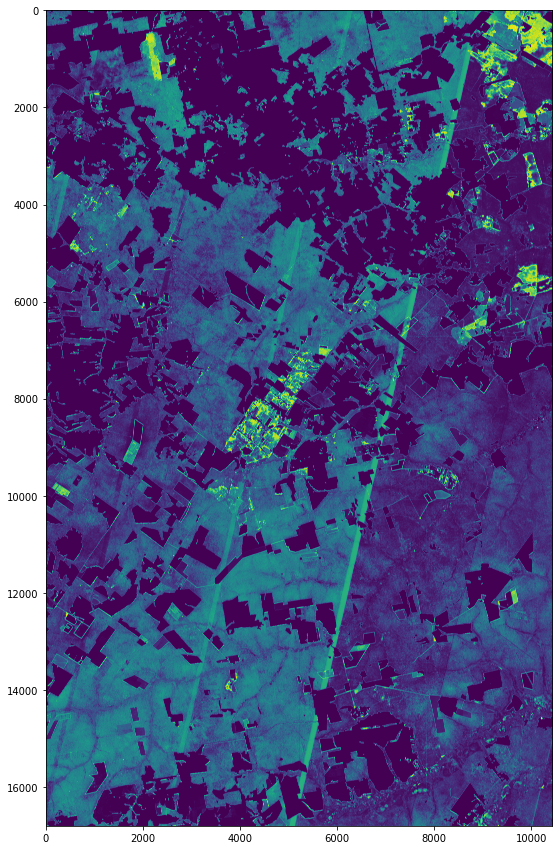

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(pred_entropy)
'''
prob_tmp_unpad = trainer.prob_tmp.copy()
prob_tmp_unpad = prob_tmp_unpad[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]  

prob_tmp_unpad[trainer.label_mask == 2] = 0
'''

In [ ]:
trainer.setUncertainty()

> d:\jorge\deforestation_uncertainty\src\uncertainty.py(42)predictive_entropy()
     40     pdb.set_trace()
     41     K = pred_mean.shape[-1]
---> 42     for k in range(K):
     43         pred_entropy = pred_entropy + pred_mean[..., k] * np.log(pred_mean[..., k] + epsilon)
     44     pred_entropy = - pred_entropy / np.log(K)



In [ ]:
# trainer.uncertainty_map = pred_entropy

In [ ]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0, np.mean(value): inf, np.max(value): inf


ic| trainer.uncertainty_to_show.shape: (16795, 10420)


(16795, 10420)

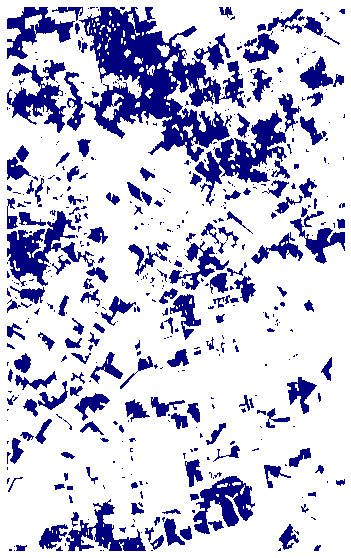

In [ ]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44596080,)


ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


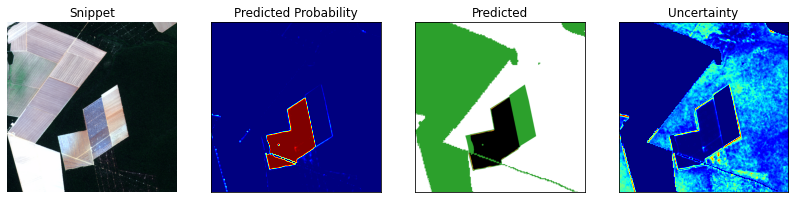

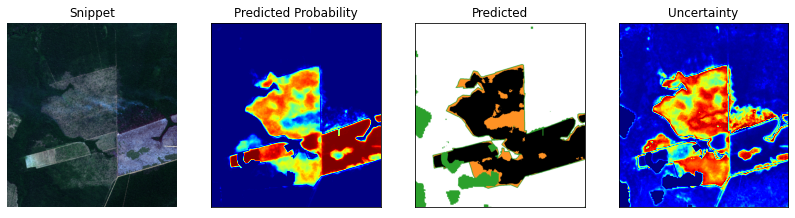

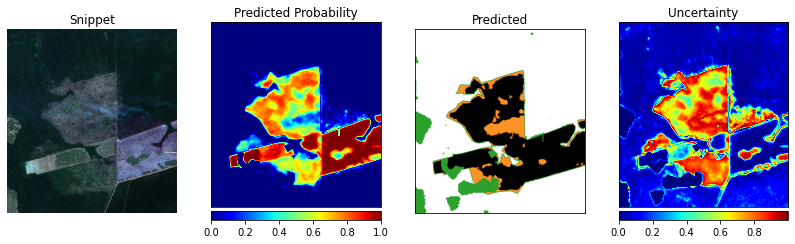

In [ ]:
trainer.logger.plotCropSample(trainer)

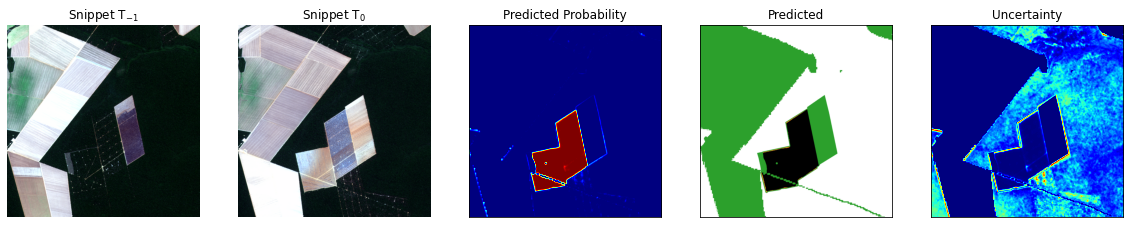

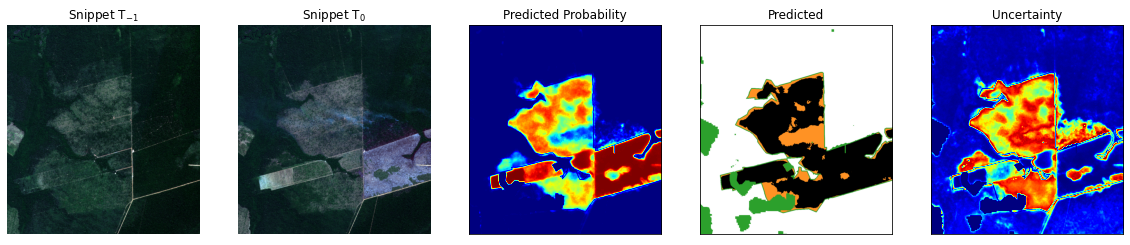

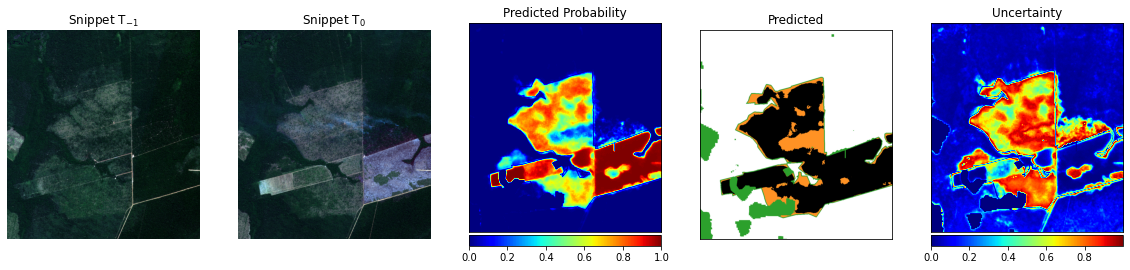

In [ ]:
trainer.logger.plotCropSampleT0T1(trainer)

In [ ]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [ ]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [ ]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 0.00028277626979975534
    np.mean(value): 0.27470116168705466
    np.max(value): 0.999997820747091


Get precision-recall threshold

In [ ]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (44596080,)
    self.label_mask_current_deforestation_test.shape: (44596080,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.996997820747091, 0.998497820747091]
threshold 0.0025
(42696,) (42696,)
cm_correct [[42696]]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54181542,)
    self.label_mask_current_deforestation_test.shape: (54181542,)


threshold 0.0025
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    2723   738123]]
[1.         0.99632447]
threshold 0.005
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    4198   736648]]
[1.         0.99433351]
threshold 0.0075
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    5663   735183]]
[1.         0.99235604]
threshold 0.01
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    6989   733857]]
[1.         0.99056619]
threshold 0.015
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    9131   731715]]
[1.        0.9876749]
threshold 0.025
(54181542,) (54181542,)
cm_audited [[53440592      104]
 [   12523   728323]]
[0.99985723 0.98309635]
threshold 0.05
(54181542,) (54181542,)
cm_audited [[53440284      412]
 [   18744   722102]]
[0.99942977 0.9746992 ]
threshold 0.08
(54181542,) (54181542,)
cm_audited [[53440015      681]
 [   24811   716035]]
[0.99904983 0.96650991]
threshold 0.1
(54181542,) (54181542,)
cm_audited [[53439863

ic| metric_values_audited: array([[1.        , 0.99632447],
                                  [1.        , 0.99433351],
                                  [1.        , 0.99235604],
                                  [1.        , 0.99056619],
                                  [1.        , 0.9876749 ],
                                  [0.99985723, 0.98309635],
                                  [0.99942977, 0.9746992 ],
                                  [0.99904983, 0.96650991],
                                  [0.99883202, 0.96155206],
                                  [0.99806684, 0.94777187],
                                  [0.9959265 , 0.93162682],
                                  [0.99408436, 0.92273023],
                                  [0.99215648, 0.91278889],
                                  [0.9905476 , 0.90372898],
                                  [0.98647548, 0.88756908],
                                  [0.97739504, 0.85332714],
                                  [0.973

cm_audited [[53425024    15672]
 [  193880   546966]]
[0.9721455  0.73829919]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

In [ ]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [ ]:
trainer.xlim


[-0.1, 10.4]

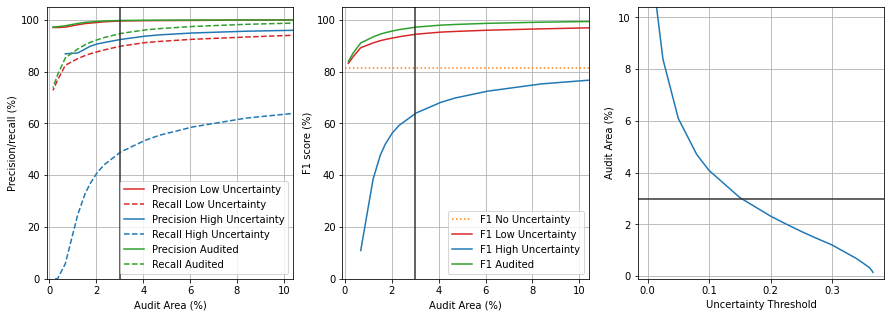

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

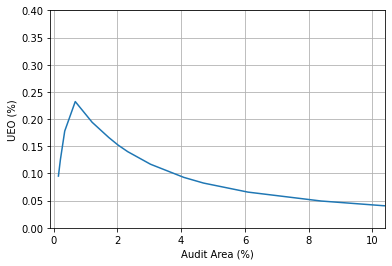

In [ ]:
trainer.plotUEO()

In [ ]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929
(52450319,) (52450319,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1731223,)
    predicted_test_classified_incorrect.shape: (1731223,)
ic

cm_correct [[52076627     1217]
 [   36707   335768]]
cm_incorrect [[1348397   14455]
 [ 184832  183539]]


| TP_H + FN_H + FP_H + TN_H: 1731223
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1731223
    len(label_mask_current_deforestation_test): 54181542


[0.99638856 0.9014511  0.4532224  0.03195227 0.92699274 0.49824498
 0.11264581]
0.22700792051372695
threshold 0.22700792051372695
(53100692,) (53100692,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1080850,)
    predicted_test_classified_incorrect.shape: (1080850,)
ic| TP_H + FN_H + FP_H + TN_H: 1080850
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1080850
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[52630750     4147]
 [   57816   407979]]
cm_incorrect [[794274  11525]
 [163723 111328]]
[0.98993754 0.87587673 0.5506934  0.01994868 0.9061887  0.40475403
 0.15334792]
0.08763636090393405
threshold 0.08763636090393405
(51772900,) (51772900,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2408642,)
    predicted_test_classified_incorrect.shape: (2408642,)


cm_correct [[51462518      737]
 [   26310   283335]]


ic| TP_H + FN_H + FP_H + TN_H: 2408642
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 2408642
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[1962506   14935]
 [ 195229  235972]]
[0.99740559 0.91503173 0.3824479  0.04445503 0.94047595 0.54724363
 0.08628524]
0.16401704072386725
threshold 0.16401704072386725
(52656565,) (52656565,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1524977,)
    predicted_test_classified_incorrect.shape: (1524977,)
ic| TP_H + FN_H 

cm_correct [[52257171     1672]
 [   41902   355820]]
cm_incorrect [[1167853   14000]
 [ 179637  163487]]


+ FP_H + TN_H: 1524977
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1524977
    len(label_mask_current_deforestation_test): 54181542


[0.99532297 0.894645   0.48028875 0.02814569 0.92112098 0.47646623
 0.1234496 ]
0.15380089255642282
threshold 0.15380089255642282
(52569259,) (52569259,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1612283,)
    predicted_test_classified_incorrect.shape: (1612283,)
ic

cm_correct [[52181159     1438]
 [   39608   347054]]
cm_incorrect [[1243865   14234]
 [ 181931  172253]]


| TP_H + FN_H + FP_H + TN_H: 1612283
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1612283
    len(label_mask_current_deforestation_test): 54181542


[0.99587365 0.89756428 0.46845633 0.02975705 0.92367296 0.48633761
 0.1186485 ]
0.15261323206260033
threshold 0.15261323206260033
(52558738,) (52558738,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1622804,)
    predicted_test_classified_incorrect.shape: (1622804,)
ic

cm_correct [[52171985     1413]
 [   39338   346002]]
cm_incorrect [[1253039   14259]
 [ 182201  173305]]


| TP_H + FN_H + FP_H + TN_H: 1622804
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1622804
    len(label_mask_current_deforestation_test): 54181542


[0.99593282 0.89791353 0.46703633 0.02995123 0.92397795 0.48748826
 0.11809649]
0.14812831227039625
threshold 0.14812831227039625
(52518248,) (52518248,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1663294,)
    predicted_test_classified_incorrect.shape: (1663294,)
ic

cm_correct [[52136495     1325]
 [   38294   342134]]
cm_incorrect [[1288529   14347]
 [ 183245  177173]]


| TP_H + FN_H + FP_H + TN_H: 1663294
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1663294
    len(label_mask_current_deforestation_test): 54181542


[0.99614219 0.89933969 0.46181528 0.03069854 0.92508876 0.49157645
 0.11603176]
0.15170328989037926
threshold 0.15170328989037926
(52550590,) (52550590,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1630952,)
    predicted_test_classified_incorrect.shape: (1630952,)
ic

cm_correct [[52164908     1394]
 [   39101   345187]]
cm_incorrect [[1260116   14278]
 [ 182438  174120]]


| TP_H + FN_H + FP_H + TN_H: 1630952
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1630952
    len(label_mask_current_deforestation_test): 54181542


[0.99597785 0.89825079 0.46593624 0.03010162 0.92421363 0.4883357
 0.11769204]
0.15243317335660386
threshold 0.15243317335660386
(52557161,) (52557161,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624381,)
    predicted_test_classified_incorrect.shape: (1624381,)
ic

cm_correct [[52170614     1411]
 [   39293   345843]]
cm_incorrect [[1254410   14261]
 [ 182246  173464]]


| TP_H + FN_H + FP_H + TN_H: 1624381
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1624381
    len(label_mask_current_deforestation_test): 54181542


[0.99593669 0.8979763  0.46682171 0.02998034 0.92403249 0.48765567
 0.1180162 ]
0.15225472592389733
threshold 0.15225472592389733
(52555532,) (52555532,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1626010,)
    predicted_test_classified_incorrect.shape: (1626010,)
ic

cm_correct [[52169200     1407]
 [   39251   345674]]
cm_incorrect [[1255824   14265]
 [ 182288  173633]]


| TP_H + FN_H + FP_H + TN_H: 1626010
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1626010
    len(label_mask_current_deforestation_test): 54181542


[0.99594619 0.89802949 0.4665936  0.0300104  0.92408115 0.4878414
 0.11793171]
0.1522880615155332
threshold 0.1522880615155332
(52555814,) (52555814,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625728,)
    predicted_test_classified_incorrect.shape: (1625728,)
ic

cm_correct [[52169440     1407]
 [   39263   345704]]
cm_incorrect [[1255584   14265]
 [ 182276  173603]]


| TP_H + FN_H + FP_H + TN_H: 1625728
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625728
    len(label_mask_current_deforestation_test): 54181542


[0.99594654 0.89800944 0.46663409 0.0300052  0.92406903 0.48781468
 0.11794361]
0.15232585578480035
threshold 0.15232585578480035
(52556179,) (52556179,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625363,)
    predicted_test_classified_incorrect.shape: (1625363,)
ic

cm_correct [[52169762     1409]
 [   39269   345739]]
cm_incorrect [[1255262   14263]
 [ 182270  173568]]


| TP_H + FN_H + FP_H + TN_H: 1625363
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625363
    len(label_mask_current_deforestation_test): 54181542


[0.99594121 0.89800472 0.46668133 0.02999846 0.92406472 0.48777253
 0.11796408]
0.1523668474496392
threshold 0.1523668474496392
(52556547,) (52556547,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624995,)
    predicted_test_classified_incorrect.shape: (1624995,)
ic

cm_correct [[52170073     1409]
 [   39283   345782]]
cm_incorrect [[1254951   14263]
 [ 182256  173525]]


| TP_H + FN_H + FP_H + TN_H: 1624995
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1624995
    len(label_mask_current_deforestation_test): 54181542
ic| self.threshold_optimal: 0.15232585578480035


[0.99594172 0.89798346 0.46673938 0.02999167 0.92404733 0.48772981
 0.11798075]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.15232585578480035
(52556179,) (52556179,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625363,)
    predicted_test_classified_incorrect.shape: (1625363,)
ic

cm_correct [[52169762     1409]
 [   39269   345739]]
cm_incorrect [[1255262   14263]
 [ 182270  173568]]


| TP_H + FN_H + FP_H + TN_H: 1625363
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625363
    len(label_mask_current_deforestation_test): 54181542


[0.99594121 0.89800472 0.46668133 0.02999846 0.92406472 0.48777253
 0.11796408]
threshold 0.15232585578480035
(54181542,) (54181542,)


ic| self.m_optimal: {'AA': array([0.02999846]),
                     'UEO': array([0.11796408]),
                     'f1': 81.41,
                     'f1_H': array([0.63850615]),
                     'f1_L': array([0.9444408]),
                     'precision_H': array([0.92406472]),
                     'precision_L': array([0.99594121]),
                     'recall_H': array([0.48777253]),
                     'recall_L': array([0.89800472]),
                     'recall_Ltotal': array([0.46668133])}
ic| self.m_audited_optimal: {'f1': array([0.97182636]),
                             'precision': array([0.99799569]),
                             'recall': array([0.94699438])}


cm_audited [[53439287     1409]
 [   39269   701577]]
[0.99799569 0.94699438]


{'metrics': {'precision_L': array([0.99594121]),
  'recall_L': array([0.89800472]),
  'recall_Ltotal': array([0.46668133]),
  'AA': array([0.02999846]),
  'precision_H': array([0.92406472]),
  'recall_H': array([0.48777253]),
  'UEO': array([0.11796408]),
  'f1_L': array([0.9444408]),
  'f1_H': array([0.63850615]),
  'f1': 81.41},
 'metrics_audited': {'precision': array([0.99799569]),
  'recall': array([0.94699438]),
  'f1': array([0.97182636])},
 'exp': 123}